In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
YP = pd.read_csv(r'/home/baranov_lab/10X/yp_cxcl12_new.csv', header = 0, index_col=0)

In [3]:
YP

ANN9  nearest    surface  cd31+yopro+  per+yopro+         per+  \
ID                                                                         
0      50.6544  11.6816    3.56043     579.6720     579.672    23.218900   
1      43.8764  11.6816    3.96264     579.8930     579.893    27.220300   
2     115.8920  89.8632    3.60873     513.5400     513.540    -0.847958   
3     124.1030  62.4853    8.03480     485.8230     485.823    -3.139810   
4     113.0570  19.7267    2.07431     494.1790     494.179    31.159200   
...        ...      ...        ...          ...         ...          ...   
9567  109.1480  61.4610  191.09700     161.1930    1067.120  1000.040000   
9568   91.7274  22.1903   72.78590     123.0180    1013.520   945.592000   
9569   69.5477  32.1447  139.86500     127.9560    1043.270   971.646000   
9570   75.7428  21.8988  171.41000      80.5173    1046.040   932.999000   
9571   85.0521  33.9790  192.90600      92.3000    1063.930   944.102000   

         cd31+ patient  
ID                      
0      74.7137      YP  
1      64.7206      YP  
2      70.8588      YP  
3      40.8147      YP  
4      69.4189      YP  
...        ...     ...  
9567  149.6730      OP  
9568  171.6940      OP  
9569  144.0250      OP  
9570  199.0090      OP  
9571  188.7230      OP  

[67105 rows x 8 columns]

In [4]:
YP = YP.reindex(columns=['ANN9',
 'nearest',
 'surface',
 'per+',
 'cd31+','patient'])

In [5]:
YPYP = YP.iloc[1:41959]

In [6]:
YPYP

ANN9   nearest     surface       per+     cd31+ patient
ID                                                                 
1        43.8764  11.68160    3.962640  27.220300  64.72060      YP
2       115.8920  89.86320    3.608730  -0.847958  70.85880      YP
3       124.1030  62.48530    8.034800  -3.139810  40.81470      YP
4       113.0570  19.72670    2.074310  31.159200  69.41890      YP
5       113.0810  19.72670    0.510345  17.277800  49.93530      YP
...          ...       ...         ...        ...       ...     ...
213760   26.5097  10.57500   96.115400   1.925390  -7.87967      YP
213761   27.7549  10.76130   90.637900   3.701500   2.70629      YP
213762   33.5494   9.92334   79.621200   5.832180  -8.60735      YP
213763   42.1684  29.64350  122.330000   2.058810  -6.76687      YP
213764   34.1851   9.92334   84.320600   3.169390  -8.43883      YP

[41958 rows x 6 columns]

In [7]:
OPOP = YP.iloc[41959:]

In [8]:
OPOP

ANN9  nearest   surface        per+      cd31+ patient
ID                                                              
0      87.9096  52.8737  153.4310     4.69237   23.70480      OP
1      59.1236  12.6510  220.0730    -2.11949   -2.71511      OP
2      53.1574  18.1981  229.7810     2.99389   -4.76899      OP
3      55.7721  31.5069  201.4230     4.56107   -6.45037      OP
4      57.8363  37.3105  255.7040     1.71537   -2.23566      OP
...        ...      ...       ...         ...        ...     ...
9567  109.1480  61.4610  191.0970  1000.04000  149.67300      OP
9568   91.7274  22.1903   72.7859   945.59200  171.69400      OP
9569   69.5477  32.1447  139.8650   971.64600  144.02500      OP
9570   75.7428  21.8988  171.4100   932.99900  199.00900      OP
9571   85.0521  33.9790  192.9060   944.10200  188.72300      OP

[25146 rows x 6 columns]

In [9]:
YP_subset = YP

In [10]:
YP_subset_original = YP

In [11]:
YP_subset_UMAP = YP_subset

In [12]:
YP_subset

ANN9  nearest    surface         per+     cd31+ patient
ID                                                               
0      50.6544  11.6816    3.56043    23.218900   74.7137      YP
1      43.8764  11.6816    3.96264    27.220300   64.7206      YP
2     115.8920  89.8632    3.60873    -0.847958   70.8588      YP
3     124.1030  62.4853    8.03480    -3.139810   40.8147      YP
4     113.0570  19.7267    2.07431    31.159200   69.4189      YP
...        ...      ...        ...          ...       ...     ...
9567  109.1480  61.4610  191.09700  1000.040000  149.6730      OP
9568   91.7274  22.1903   72.78590   945.592000  171.6940      OP
9569   69.5477  32.1447  139.86500   971.646000  144.0250      OP
9570   75.7428  21.8988  171.41000   932.999000  199.0090      OP
9571   85.0521  33.9790  192.90600   944.102000  188.7230      OP

[67105 rows x 6 columns]

In [13]:
from plotly.offline import init_notebook_mode, iplot

In [14]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np

In [15]:
corr = YP_subset.corr()
trace = go.Heatmap(z=corr,x=corr.index,y=corr.columns)
data = [trace]
layout = dict(title="Correlation Plot of Player Skills")
fig = dict(data=data, layout=layout)
iplot(fig)

/tmp/ipykernel_743152/2647279196.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [16]:
YP_subset = YP

In [17]:
from sklearn.decomposition import PCA
pca = PCA().fit(YP_subset.loc[:, YP_subset.columns != 'patient'])

In [19]:
pcaratio = pca.explained_variance_ratio_
trace = go.Scatter(x=np.arange(len(pcaratio)),y=np.cumsum(pcaratio))
data = [trace]
layout = dict(title="CXCL12+ Dataset - PCA Explained Variance || 100% achieved at 5 components")
fig = dict(data=data, layout=layout)
iplot(fig)
iplot(fig,image = 'svg', filename = 'YP_total_PCA_cxcl12_nosurf')

In [20]:
pca = PCA(n_components=4)
skillsPCA = pca.fit_transform(YP_subset.loc[:, YP_subset.columns != 'patient'])

In [21]:
skillsPCA

array([[ -59.97784667,  -26.78860398,   33.80383485,  -44.56834044],
       [ -57.29242241,  -26.92227232,   22.21447133,  -41.84424417],
       [ -79.4442146 ,   -5.87233002,   99.12708734,   23.62861654],
       ...,
       [ 897.67017511,   41.38599999,   -5.42946497,  -58.72077605],
       [ 866.97853594,   69.32899907,   35.76855161, -104.26872672],
       [ 879.10014591,   93.28388653,   35.2852283 ,  -91.56652611]])

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
skillsPCA_labels = kmeans.fit_predict(skillsPCA)

/home/baranov_lab/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [23]:

X=YP_subset.loc[:, YP_subset.columns != 'patient']
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])
display(fig)
#iplot(fig,image = 'svg', filename = 'YP_total_inertia_cxcl12')

In [24]:
iplot(fig,image = 'svg', filename = 'YP_total_inertia_cxcl12_nosurf')

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
skillsPCA_labels = kmeans.fit_predict(skillsPCA)

/home/baranov_lab/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [26]:
dfskillsPCA = pd.DataFrame(skillsPCA)
dfskillsPCA['cluster'] = skillsPCA_labels

In [27]:
dfskillsPCA

0          1          2           3  cluster
0      -59.977847 -26.788604  33.803835  -44.568340        0
1      -57.292422 -26.922272  22.214471  -41.844244        0
2      -79.444215  -5.872330  99.127087   23.628617        0
3      -84.628949   0.763063  72.448903   38.601925        0
4      -49.641148 -15.901992  68.443059    0.662993        0
...           ...        ...        ...         ...      ...
67100  932.295060  98.614794  25.286880  -37.971667        1
67101  870.928655 -21.550592  31.636457  -54.101899        1
67102  897.670175  41.386000  -5.429465  -58.720776        1
67103  866.978536  69.328999  35.768552 -104.268727        1
67104  879.100146  93.283887  35.285228  -91.566526        1

[67105 rows x 5 columns]

In [28]:
from sklearn.manifold import TSNE
X1 = dfskillsPCA.iloc[:,:-1]
Xtsne = TSNE(n_components=2).fit_transform(X1)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = skillsPCA_labels
dftsne.columns = ['x1','x2','cluster']

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [30]:
skillsPCA_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [31]:
YP_subset['cluster'] = skillsPCA_labels

In [32]:
YP_subset

ANN9  nearest    surface         per+     cd31+ patient  cluster
ID                                                                        
0      50.6544  11.6816    3.56043    23.218900   74.7137      YP        0
1      43.8764  11.6816    3.96264    27.220300   64.7206      YP        0
2     115.8920  89.8632    3.60873    -0.847958   70.8588      YP        0
3     124.1030  62.4853    8.03480    -3.139810   40.8147      YP        0
4     113.0570  19.7267    2.07431    31.159200   69.4189      YP        0
...        ...      ...        ...          ...       ...     ...      ...
9567  109.1480  61.4610  191.09700  1000.040000  149.6730      OP        1
9568   91.7274  22.1903   72.78590   945.592000  171.6940      OP        1
9569   69.5477  32.1447  139.86500   971.646000  144.0250      OP        1
9570   75.7428  21.8988  171.41000   932.999000  199.0090      OP        1
9571   85.0521  33.9790  192.90600   944.102000  188.7230      OP        1

[67105 rows x 7 columns]

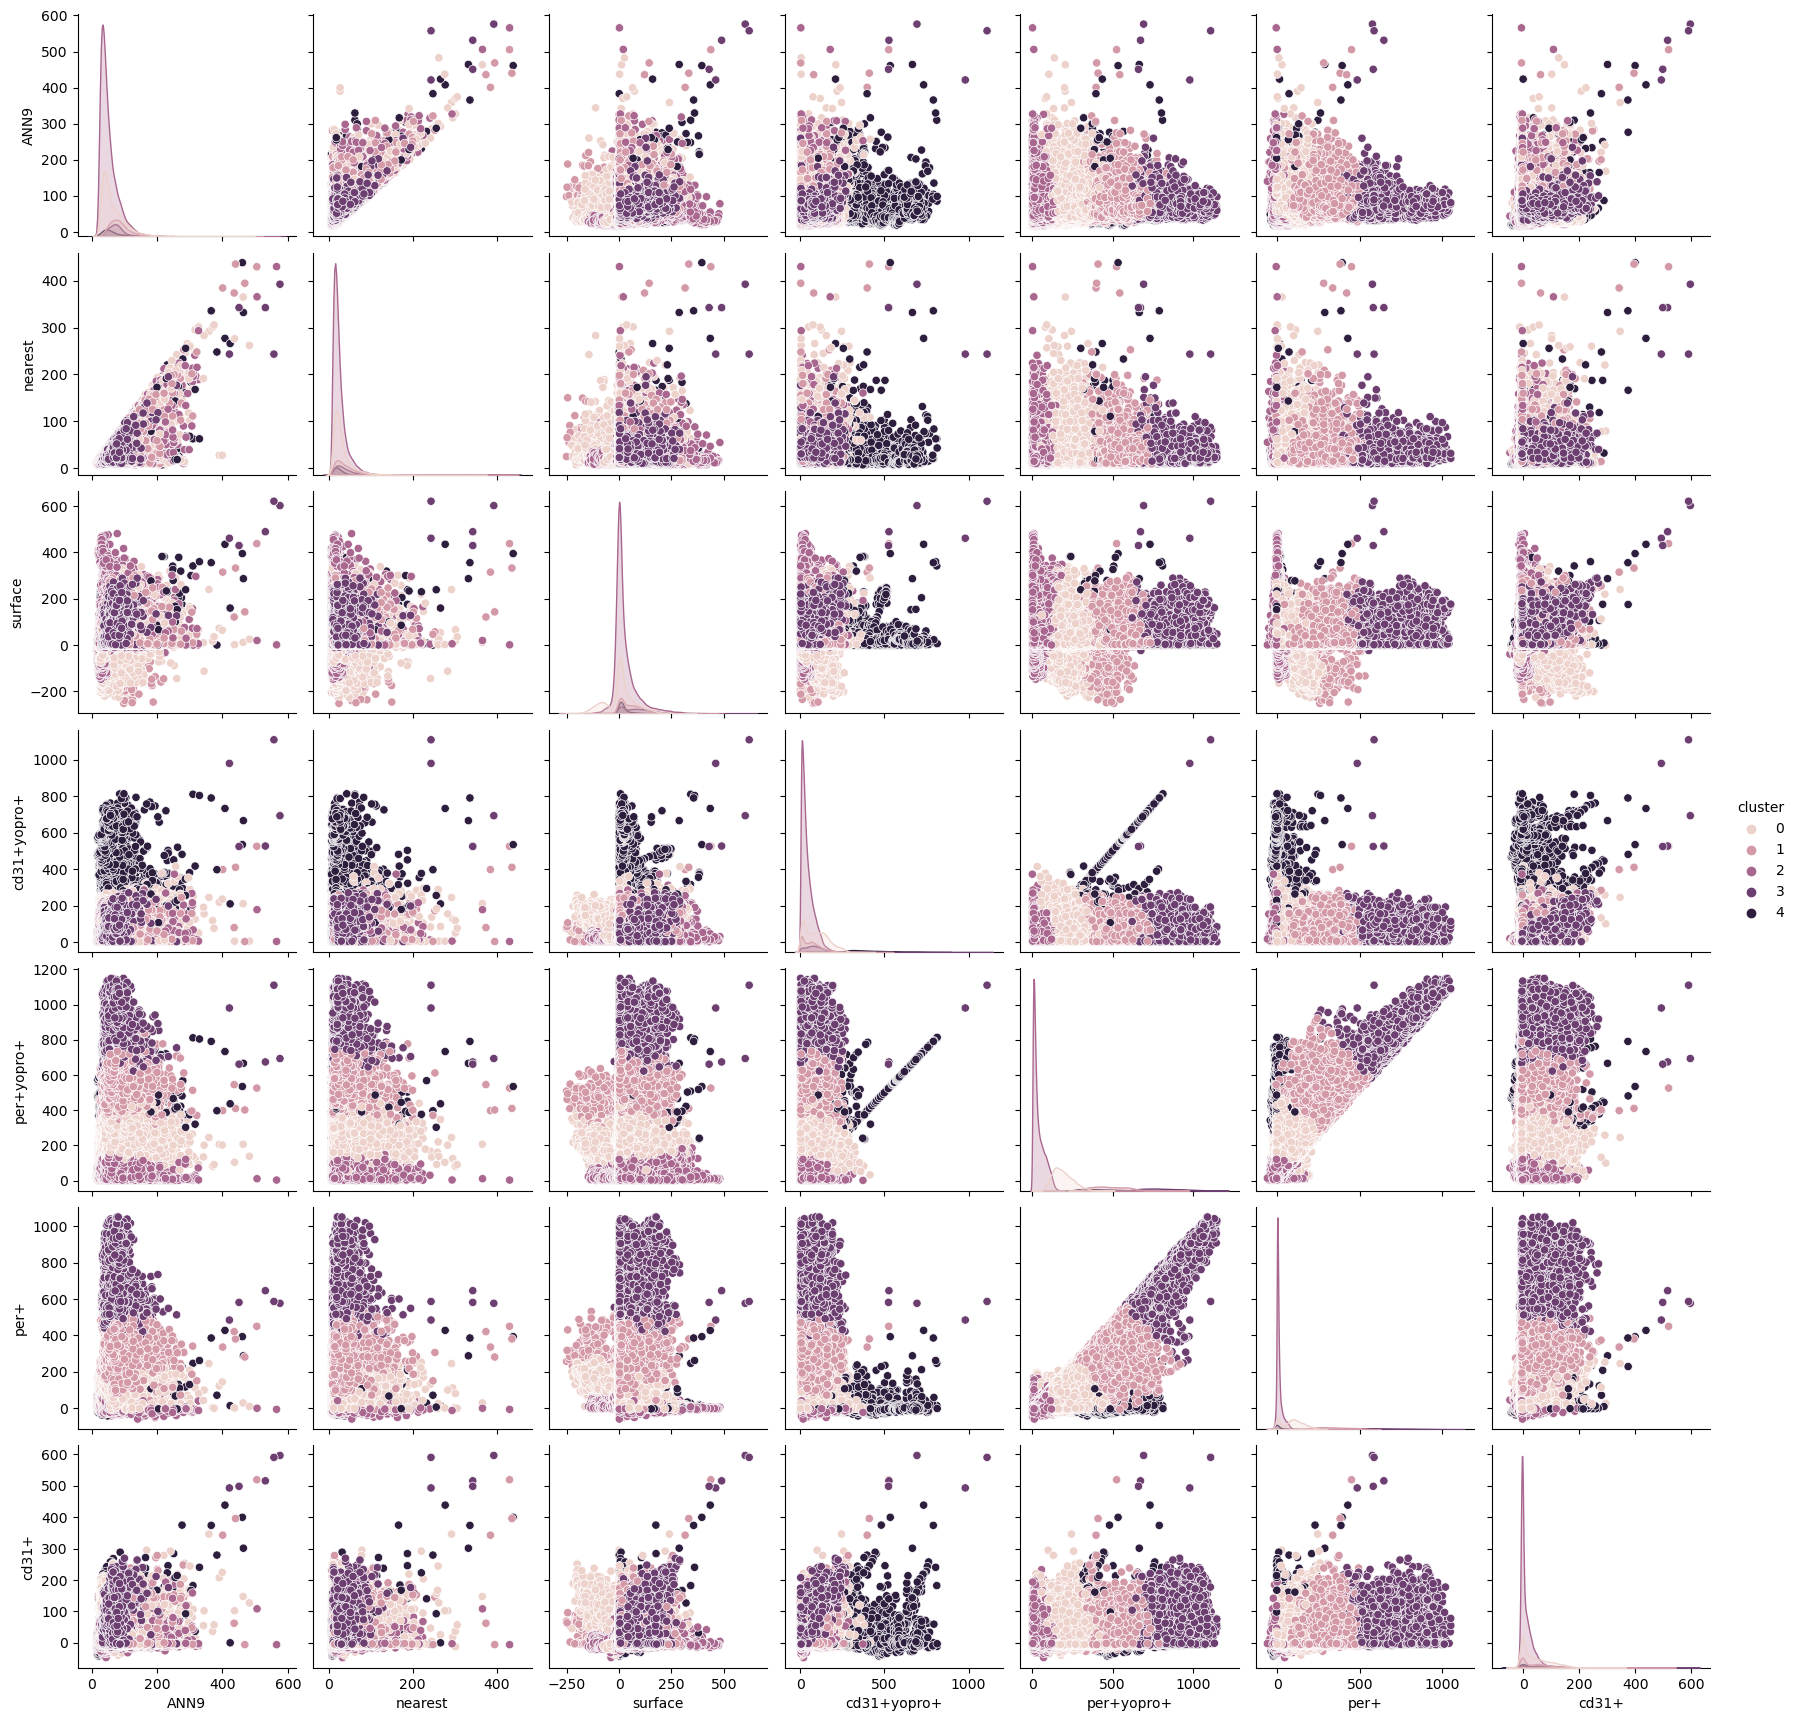

In [31]:
sns.pairplot(YP_subset, hue='cluster');

In [33]:
pca2 = PCA(n_components=2)
skillsPCA2 = pca2.fit_transform(YP_subset.loc[:, YP_subset.columns != 'patient'])
#YP_subset.loc[:, YP_subset.columns != 'status'] cluster?
dfskillsPCA2 = pd.DataFrame(skillsPCA2)
dfskillsPCA2['cluster'] = skillsPCA_labels
dfskillsPCA2.columns = ['x1','x2','cluster']

In [34]:
skillsPCA_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [35]:
dfskillsPCA2

x1         x2  cluster
0      -59.979626 -26.789859        0
1      -57.294225 -26.923738        0
2      -79.445816  -5.872634        0
3      -84.630549   0.762370        0
4      -49.642909 -15.902985        0
...           ...        ...      ...
67100  932.292546  98.604117        1
67101  870.926146 -21.559532        1
67102  897.667646  41.375728        1
67103  866.976230  69.319591        1
67104  879.097839  93.274131        1

[67105 rows x 3 columns]

In [36]:
YP_subset

ANN9  nearest    surface         per+     cd31+ patient  cluster
ID                                                                        
0      50.6544  11.6816    3.56043    23.218900   74.7137      YP        0
1      43.8764  11.6816    3.96264    27.220300   64.7206      YP        0
2     115.8920  89.8632    3.60873    -0.847958   70.8588      YP        0
3     124.1030  62.4853    8.03480    -3.139810   40.8147      YP        0
4     113.0570  19.7267    2.07431    31.159200   69.4189      YP        0
...        ...      ...        ...          ...       ...     ...      ...
9567  109.1480  61.4610  191.09700  1000.040000  149.6730      OP        1
9568   91.7274  22.1903   72.78590   945.592000  171.6940      OP        1
9569   69.5477  32.1447  139.86500   971.646000  144.0250      OP        1
9570   75.7428  21.8988  171.41000   932.999000  199.0090      OP        1
9571   85.0521  33.9790  192.90600   944.102000  188.7230      OP        1

[67105 rows x 7 columns]

In [37]:
dftsne

x1         x2  cluster
0      13.595350   4.078947        0
1      13.984843   2.903627        0
2      19.737286  36.333794        0
3       8.366425  50.140694        0
4      23.722883  27.115240        0
...          ...        ...      ...
67100  92.584671 -54.947014        1
67101  95.965057 -51.115253        1
67102  92.311760 -54.067646        1
67103  84.586769 -44.680557        1
67104  84.082054 -44.009678        1

[67105 rows x 3 columns]

In [38]:
dftsne_OP = dftsne.iloc[1:41959]
dfskillsPCA2_OP = dfskillsPCA2.iloc[1:41959]

In [39]:
dftsne_OP

x1          x2  cluster
1      13.984843    2.903627        0
2      19.737286   36.333794        0
3       8.366425   50.140694        0
4      23.722883   27.115240        0
5      15.008766   28.301582        0
...          ...         ...      ...
41954 -23.801786  118.629440        2
41955 -48.325554  109.029030        2
41956 -59.020710  103.287285        0
41957 -10.334779  112.602280        2
41958 -59.013794  103.653206        2

[41958 rows x 3 columns]

In [40]:
dftsne_YP = dftsne.iloc[41959:]
dfskillsPCA2_YP = dfskillsPCA2.iloc[41959:]

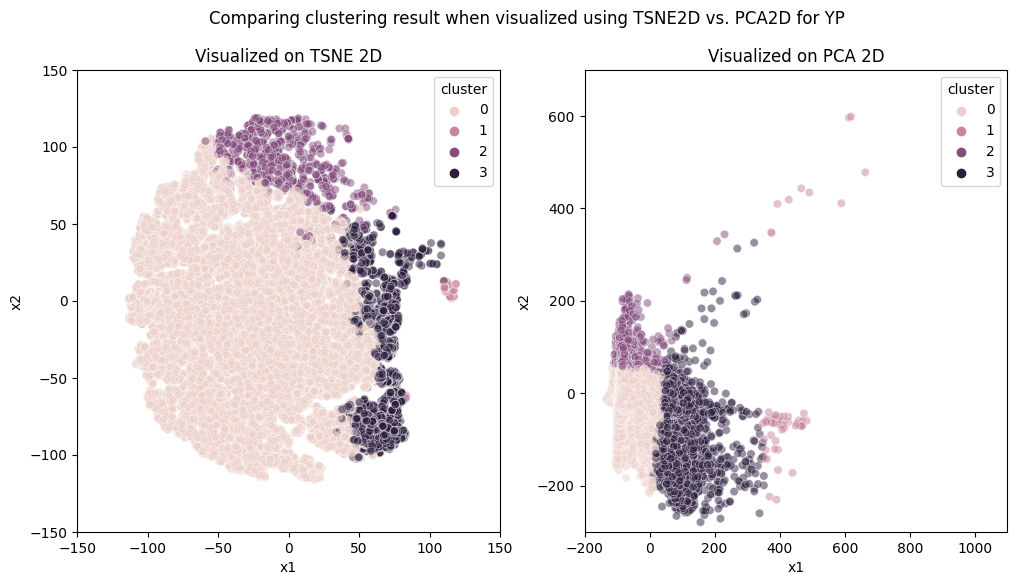

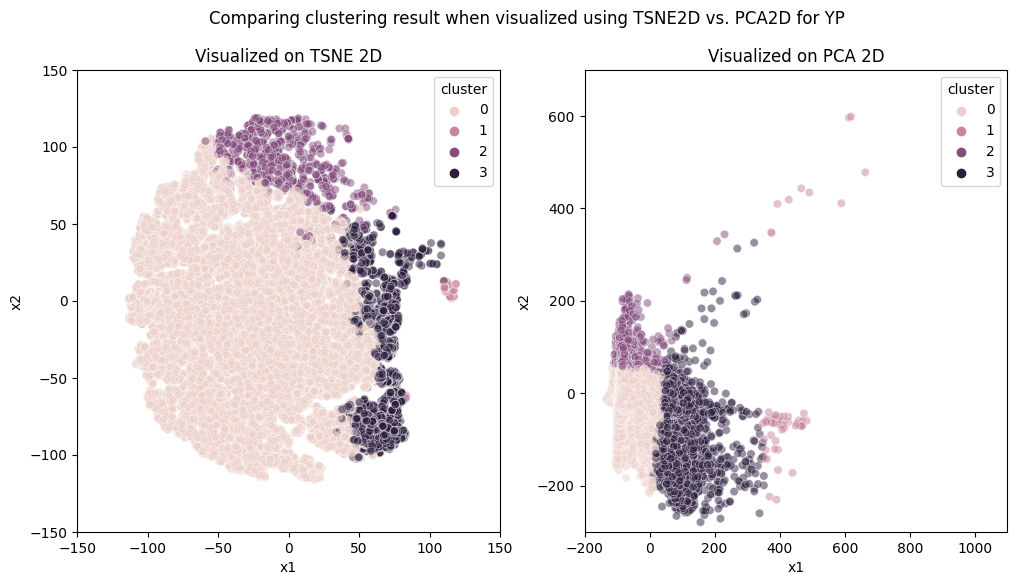

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=dftsne_OP,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')
sns.scatterplot(data=dfskillsPCA2_OP,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on PCA 2D')
ax[0].set_xlim(-150, 150)
ax[0].set_ylim(-150, 150)
ax[1].set_xlim(-200, 1100)
ax[1].set_ylim(-300, 700)
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. PCA2D for YP')
display(fig)
fig.savefig(f'YP_tsnepca_YP_cxcl12_nosurf.pdf',dpi = 300, facecolor = 'white')

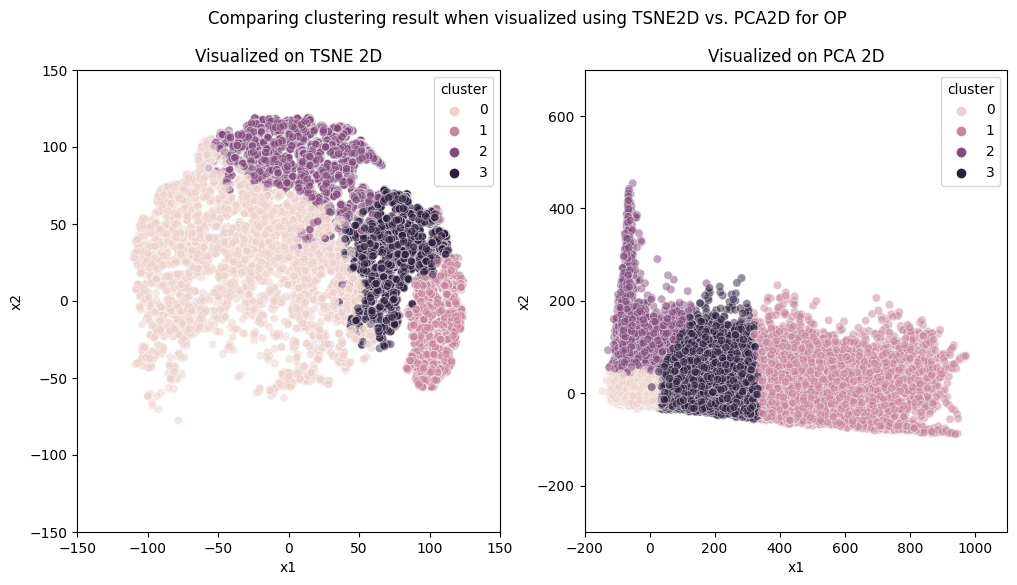

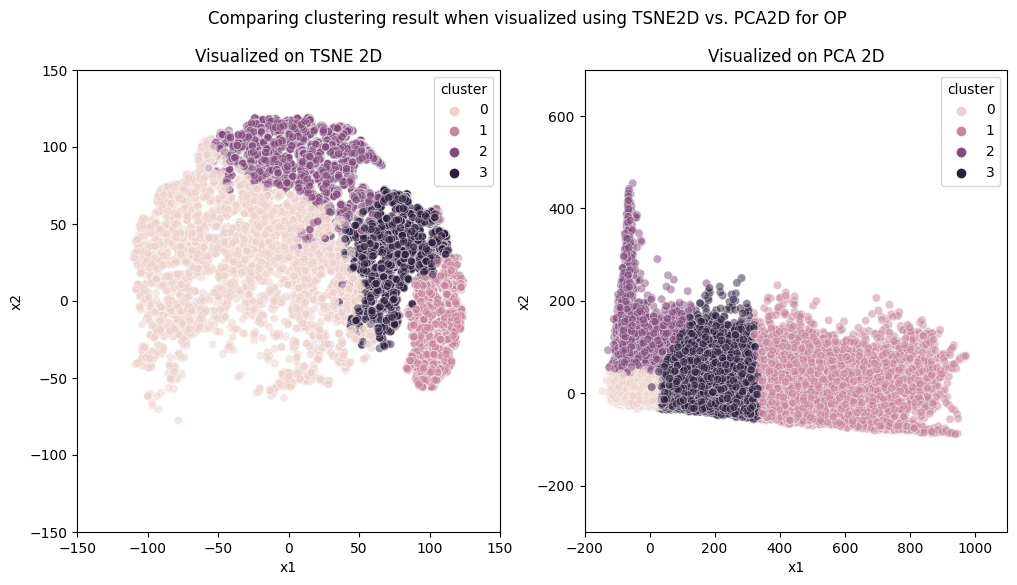

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=dftsne_YP,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')
sns.scatterplot(data=dfskillsPCA2_YP,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on PCA 2D')
ax[0].set_xlim(-150, 150)
ax[0].set_ylim(-150, 150)
ax[1].set_xlim(-200, 1100)
ax[1].set_ylim(-300, 700)
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. PCA2D for OP')
display(fig)
fig.savefig(f'YP_tsnepca_OP_cxcl12_nosurf.pdf',dpi = 300, facecolor = 'white')

In [43]:
from sklearn.manifold import TSNE
X1 = dfskillsPCA.iloc[:,:-1]
Xtsne = TSNE(n_components=3).fit_transform(X1)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = skillsPCA_labels
dftsne.columns = ['x1','x2','x3','cluster']

In [44]:
YP_subset_UMAP

ANN9  nearest    surface         per+     cd31+ patient  cluster
ID                                                                        
0      50.6544  11.6816    3.56043    23.218900   74.7137      YP        0
1      43.8764  11.6816    3.96264    27.220300   64.7206      YP        0
2     115.8920  89.8632    3.60873    -0.847958   70.8588      YP        0
3     124.1030  62.4853    8.03480    -3.139810   40.8147      YP        0
4     113.0570  19.7267    2.07431    31.159200   69.4189      YP        0
...        ...      ...        ...          ...       ...     ...      ...
9567  109.1480  61.4610  191.09700  1000.040000  149.6730      OP        1
9568   91.7274  22.1903   72.78590   945.592000  171.6940      OP        1
9569   69.5477  32.1447  139.86500   971.646000  144.0250      OP        1
9570   75.7428  21.8988  171.41000   932.999000  199.0090      OP        1
9571   85.0521  33.9790  192.90600   944.102000  188.7230      OP        1

[67105 rows x 7 columns]

In [45]:
avgs_raw = YP_subset_UMAP

In [46]:
avgsraw_YP = avgs_raw.iloc[1:41959]

In [47]:
avgsraw_YP

ANN9   nearest     surface       per+     cd31+ patient  cluster
ID                                                                          
1        43.8764  11.68160    3.962640  27.220300  64.72060      YP        0
2       115.8920  89.86320    3.608730  -0.847958  70.85880      YP        0
3       124.1030  62.48530    8.034800  -3.139810  40.81470      YP        0
4       113.0570  19.72670    2.074310  31.159200  69.41890      YP        0
5       113.0810  19.72670    0.510345  17.277800  49.93530      YP        0
...          ...       ...         ...        ...       ...     ...      ...
213760   26.5097  10.57500   96.115400   1.925390  -7.87967      YP        2
213761   27.7549  10.76130   90.637900   3.701500   2.70629      YP        2
213762   33.5494   9.92334   79.621200   5.832180  -8.60735      YP        0
213763   42.1684  29.64350  122.330000   2.058810  -6.76687      YP        2
213764   34.1851   9.92334   84.320600   3.169390  -8.43883      YP        2

[41958 rows x 7 columns]

In [48]:
avgsraw_OP = avgs_raw.iloc[41959:]

In [49]:
avgsraw_OP = avgsraw_OP.groupby('cluster').mean()
avgsraw_YP = avgsraw_YP.groupby('cluster').mean()

/tmp/ipykernel_743152/1177610260.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_743152/1177610260.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [50]:
avgs_raw

ANN9  nearest    surface         per+     cd31+ patient  cluster
ID                                                                        
0      50.6544  11.6816    3.56043    23.218900   74.7137      YP        0
1      43.8764  11.6816    3.96264    27.220300   64.7206      YP        0
2     115.8920  89.8632    3.60873    -0.847958   70.8588      YP        0
3     124.1030  62.4853    8.03480    -3.139810   40.8147      YP        0
4     113.0570  19.7267    2.07431    31.159200   69.4189      YP        0
...        ...      ...        ...          ...       ...     ...      ...
9567  109.1480  61.4610  191.09700  1000.040000  149.6730      OP        1
9568   91.7274  22.1903   72.78590   945.592000  171.6940      OP        1
9569   69.5477  32.1447  139.86500   971.646000  144.0250      OP        1
9570   75.7428  21.8988  171.41000   932.999000  199.0090      OP        1
9571   85.0521  33.9790  192.90600   944.102000  188.7230      OP        1

[67105 rows x 7 columns]

In [51]:
avgs_raw = avgs_raw.groupby('cluster').mean()

/tmp/ipykernel_743152/2494778121.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [52]:
avgsraw_OP

ANN9    nearest     surface        per+      cd31+
cluster                                                         
0        78.970208  34.931824   27.677172   15.260651  11.760047
1        76.996522  36.391138   75.644413  621.773579  61.505839
2        85.430039  41.251378  149.526245   13.527648  13.138931
3        87.971115  41.200093   60.106579  256.709260  37.916232

In [53]:
#avgs_raw['surface'] = avgs_raw['surface'].abs()


In [53]:
cols = list(avgs_raw.columns.values)
cols

['ANN9', 'nearest', 'surface', 'per+', 'cd31+']

In [54]:
avgsraw_OP_new = avgsraw_OP.reindex(columns=['ANN9',
 'nearest',
 'surface',
 'per+',
 'cd31+'])

In [55]:
avgs_raw = avgs_raw.reindex(columns=['ANN9',
 'nearest',
 'surface',
 'per+',
 'cd31+'])

In [56]:
avgsraw_YP_new = avgsraw_YP.reindex(columns=['ANN9',
 'nearest',
 'surface',
 'per+',
 'cd31+'])

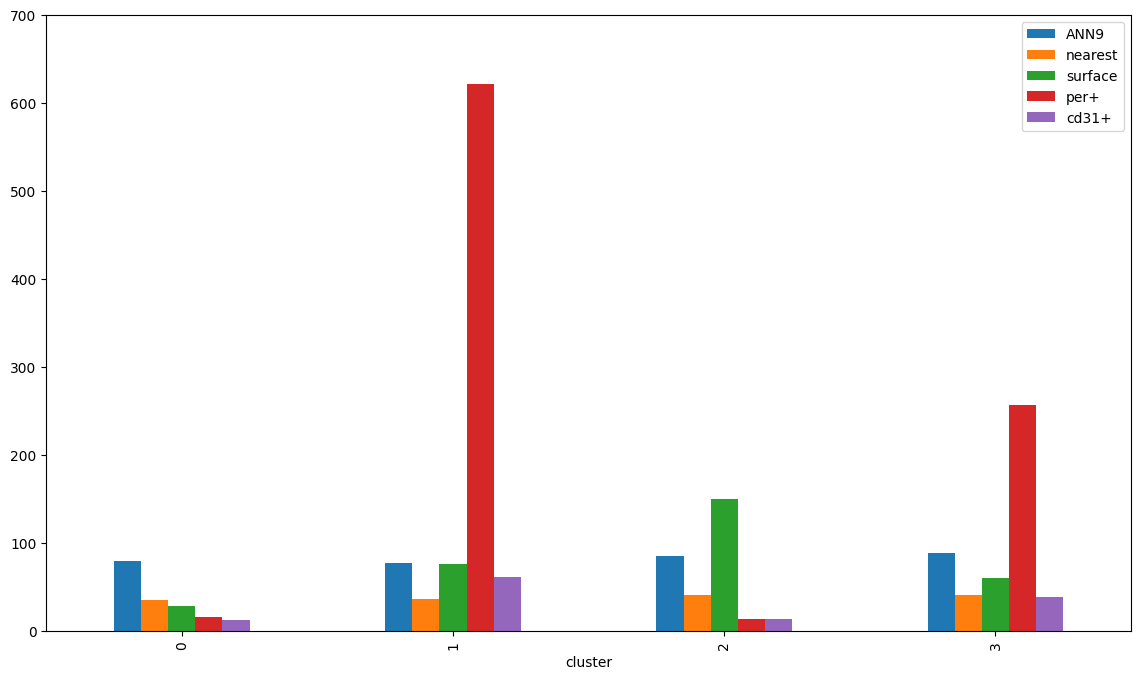

In [69]:
avgsraw_OP_new.plot.bar(figsize = (14,8),ylim = (0,700))

import matplotlib.pyplot as plt

 
# Saving figure by changing parameter values
plt.savefig("YP_barplotforOP_cxcl12_nosurf.pdf", bbox_inches="tight",
           pad_inches=0.3, transparent=True)

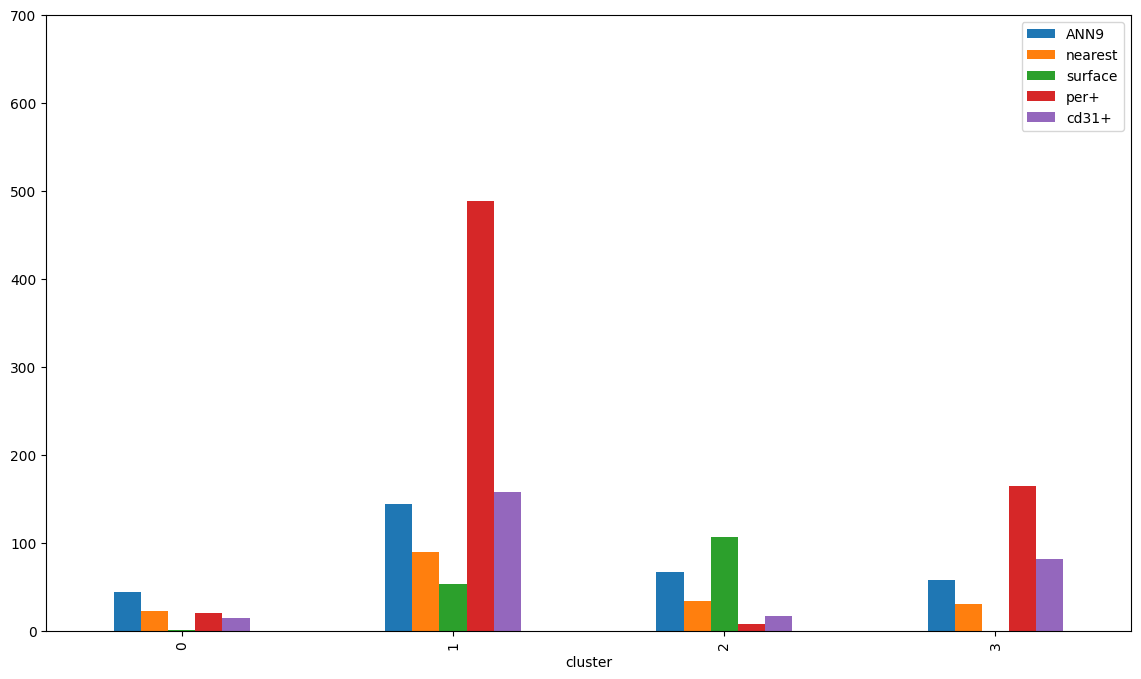

In [70]:
avgsraw_YP_new.plot.bar(figsize = (14,8),ylim = (0,700))

import matplotlib.pyplot as plt

 
# Saving figure by changing parameter values
plt.savefig("YP_barplotforYP_cxcl12_nosurf.pdf", bbox_inches="tight",
           pad_inches=0.3, transparent=True)

In [88]:
dftsne_OP.cluster.value_counts()

2    28707
0    10976
4     1821
1      439
3       15
Name: cluster, dtype: int64

In [109]:
dftsne_OP

x1         x2  cluster
1      57.946770  92.759354        4
2      50.828388  96.064384        4
3      50.406223  96.188232        4
4      50.716476  94.709061        4
5      50.635639  95.345268        4
...          ...        ...      ...
41954 -85.015503  76.641113        2
41955 -85.016449  75.681984        2
41956 -89.754730  67.690186        2
41957 -64.713310  84.351311        2
41958 -89.644287  68.206161        2

[41958 rows x 3 columns]

In [89]:
dftsne_YP.cluster.value_counts()

2    11465
0     5310
1     5092
3     3173
4      106
Name: cluster, dtype: int64

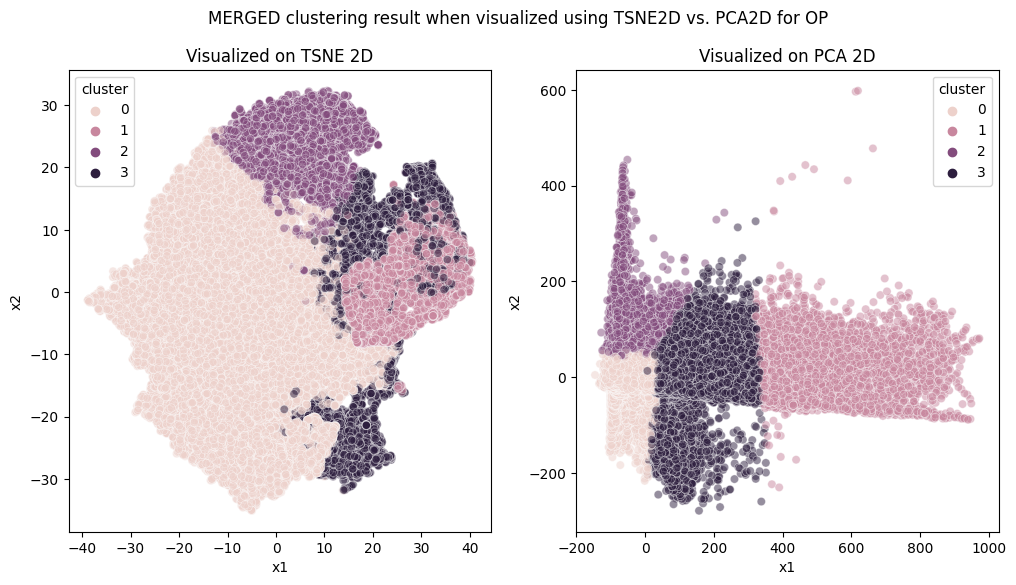

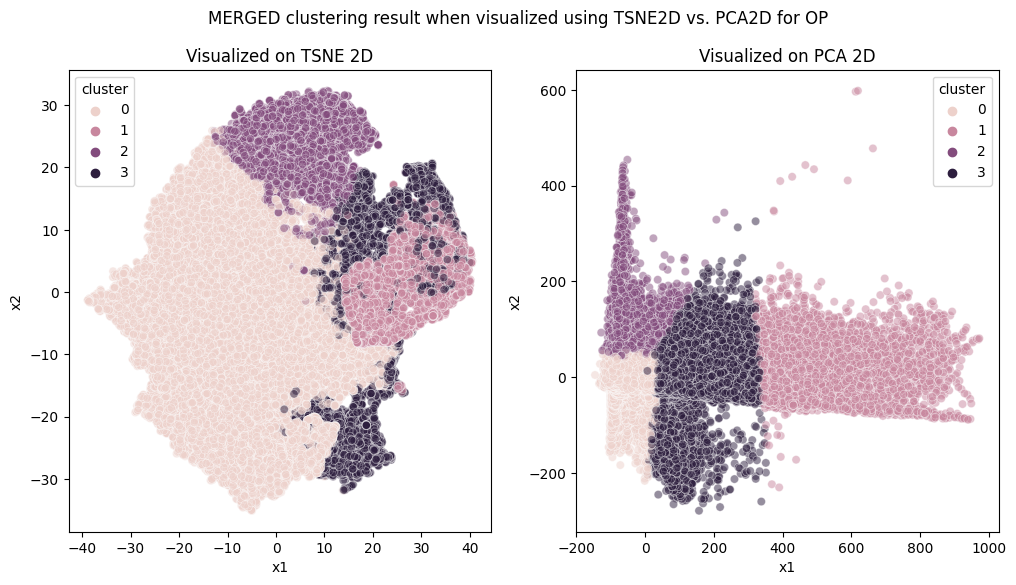

In [59]:
#merged
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')
sns.scatterplot(data=dfskillsPCA2,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on PCA 2D')

fig.suptitle('MERGED clustering result when visualized using TSNE2D vs. PCA2D for OP')
display(fig)
fig.savefig(f'YP_total_tsnepca_cxcl12_nosurf.pdf',dpi = 300, facecolor = 'white')

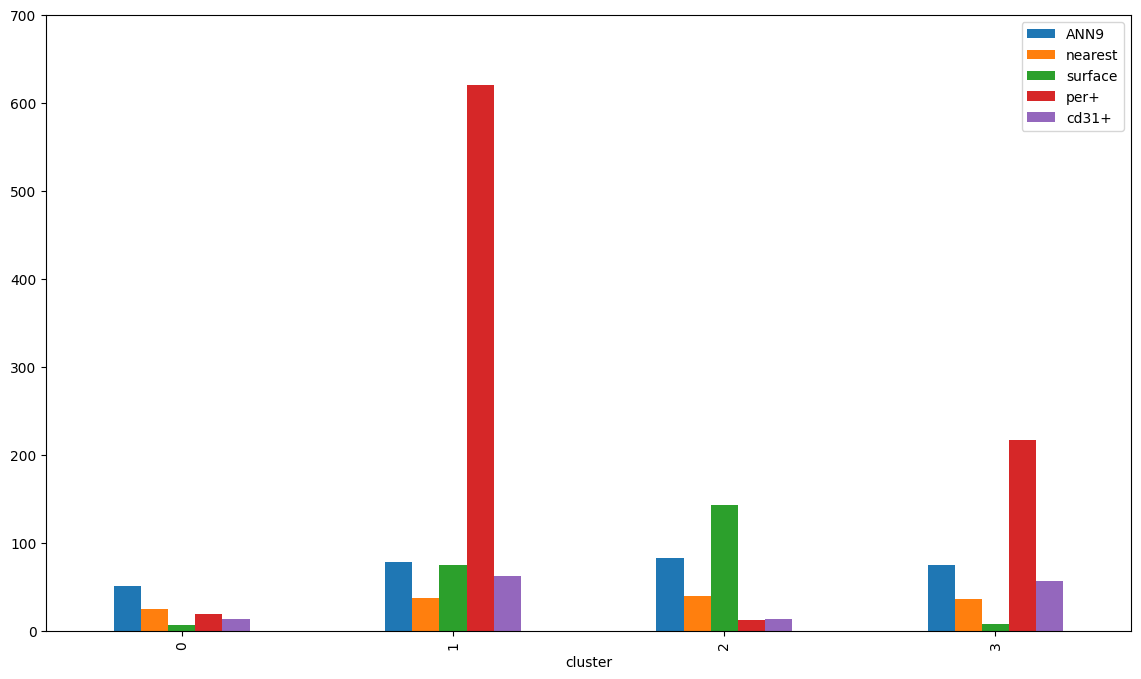

In [68]:
avgs_raw.plot.bar(figsize = (14,8), ylim = (0,700))

import matplotlib.pyplot as plt

 
# Saving figure by changing parameter values
plt.savefig("YP_total_barplot_cxcl12_nosurf.pdf", bbox_inches="tight",
           pad_inches=0.3, transparent=True)